# Does Location or Years of Experience have a greater impact on the total yearly compensation for Software Engineers?

In [ ]:
#importing pandas to be able to transform a csv file into a panda data frame

import pandas as pd

techSalariesDf = pd.read_csv("/Users/alliborland/Desktop/Visual Studio/FinalProject2302/tech_companies_salary.csv")

# Used flask to download the updated CSV but removed the code once it downloaded to not download it everytime I download
import pandas as pd
from flask import Flask, send_file
import os

app = Flask(__name__)

In [ ]:
salariesSWE = techSalariesDf[['title', 'totalyearlycompensation', 'yearsofexperience', 'location']]

#creating a new dataframe with only software engineers salary
salariesSWE = salariesSWE[salariesSWE['title'].str.contains('Software Engineer')]
#need to make sure we are not taking into account "Software Engineer Managers" or "Product Managers"
salariesSWE = salariesSWE[~salariesSWE['title'].str.contains('Software Engineering Manager')]
salariesSWE = salariesSWE[~salariesSWE['title'].str.contains('Product Manager')]


#only keeping rows that have a total yearly compensation
salariesSWE = salariesSWE[pd.notnull(salariesSWE['totalyearlycompensation'])]

# Find the frequency of each states
state_frequency = salariesSWE['location'].value_counts()
print("Frequency of Each State:")
print(state_frequency)

salariesSWE

Frequency of Each State:
location
Seattle, WA                5600
San Francisco, CA          4295
New York, NY               3000
Redmond, WA                1765
Mountain View, CA          1637
                           ... 
Suwon, KG, Korea, South       1
Graz, ST, Austria             1
Iselin, NJ                    1
Lisbon, LI, Portugal          1
Hilbert, WI                   1
Name: count, Length: 856, dtype: int64


,title,totalyearlycompensation,yearsofexperience,location
1,Software Engineer,100000,5.0,"San Francisco, CA"
4,Software Engineer,157000,5.0,"Mountain View, CA"
5,Software Engineer,208000,8.5,"Seattle, WA"
7,Software Engineer,156000,4.0,"Seattle, WA"
8,Software Engineer,120000,3.0,"Redmond, WA"
...,...,...,...,...
62637,Software Engineer,327000,10.0,"Seattle, WA"
62638,Software Engineer,237000,2.0,"Redmond, WA"
62639,Software Engineer,220000,14.0,"Seattle, WA"
62640,Software Engineer,280000,8.0,"San Francisco, CA"


we are taking the top 5 locations that software engineers work at 

/tmp/ipykernel_82/4253835281.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = salariesSWE_subset.groupby(['location', 'experience_category'])['totalyearlycompensation'].mean().reset_index()


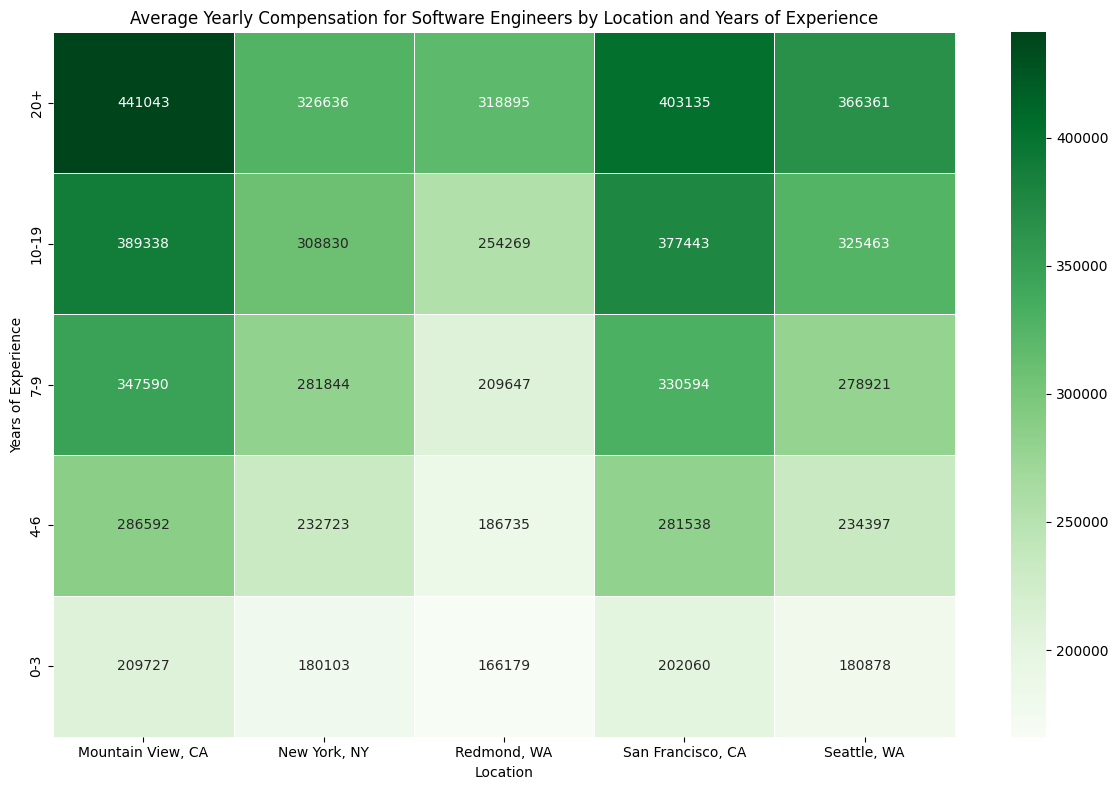

Average pay:  216300.37364707384


In [ ]:
#importing packages to visualize the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#The graph was too big so needed to group years of experience into larger categories
def categorize_experience(years):
    if years < 4:
        return "0-3"
    elif years < 7:
        return "4-6"
    elif years < 10:
        return "7-9"
    elif years < 20:
        return "10-19"
    else:
        return "20+"

salariesSWE['experience_category'] = salariesSWE['yearsofexperience'].apply(categorize_experience)
category_order = ['20+', '10-19', '7-9', '4-6', '0-3']
salariesSWE['experience_category'] = pd.Categorical(salariesSWE['experience_category'], categories=category_order, ordered=True)

# I only want the top 5 locations to show
selected_locations = ['Seattle, WA', 'San Francisco, CA', 'New York, NY', 'Redmond, WA', 'Mountain View, CA']

salariesSWE_subset = salariesSWE[salariesSWE['location'].isin(selected_locations)]

# calculating the mean in totalyearlycompensation within each category
# index brings the grouped columns back as regular columns 
agg_data = salariesSWE_subset.groupby(['location', 'experience_category'])['totalyearlycompensation'].mean().reset_index()

plt.figure(figsize=(12, 8))

# gets the data ready for a heatmap
pivot_table = agg_data.pivot(index='experience_category', columns='location', values='totalyearlycompensation')

# cmap is color, annot is if u should show numeric data, fmt is how it is set up, and linewidth is self-explanatory
heatmap = sns.heatmap(pivot_table, cmap='Greens', annot=True, fmt=".0f", linewidths=.5)
plt.xlabel('Location')
plt.ylabel('Years of Experience')
plt.title('Average Yearly Compensation for Software Engineers by Location and Years of Experience')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# getting the mean and printing the average
average_pay = techSalariesDf['totalyearlycompensation'].mean()
print("Average pay: ", average_pay)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b1639a5-1f60-4e70-b39d-b83cfcee6430' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>